Classification - Testing different models on one data set

In [1]:
# Import Libraries and Modules
import pandas as pd
import numpy as np
import time
from pandas_datareader import data, wb
from datetime import datetime
import matplotlib.pyplot as plt

Prepare Data

In [2]:
# Setting the Date
start = pd.to_datetime('2019-01-01')
end = pd.to_datetime('today')

In [3]:
# Pandas DataReader API (Quandl, Google, Yahoo, AlphaVantage, sooq ...)
Tickers = ['AAPL', 'TSLA', 'MSFT', 'QQQ', 'AMZN', 'SPY']
Stock_df = data.DataReader(Tickers, 'yahoo', start, end)
Stock_df.head()

Attributes  Adj Close                                                  \
Symbols          AAPL       TSLA        MSFT         QQQ         AMZN   
Date                                                                    
2019-01-02  38.629097  62.023998   98.860214  153.021332  1539.130005   
2019-01-03  34.781353  60.071999   95.223351  148.022064  1500.280029   
2019-01-04  36.266144  63.537998   99.652115  154.355118  1575.390015   
2019-01-07  36.185429  66.991997   99.779205  156.192795  1629.510010   
2019-01-08  36.875229  67.070000  100.502670  157.605637  1656.579956   

Attributes                  Close                                     ...  \
Symbols            SPY       AAPL       TSLA        MSFT         QQQ  ...   
Date                                                                  ...   
2019-01-02  242.056915  39.480000  62.023998  101.120003  154.880005  ...   
2019-01-03  236.280746  35.547501  60.071999   97.400002  149.820007  ...   
2019-01-04  244.195160  37.064999  63.537998  101.930000  156.229996  ...   
2019-01-07  246.120560  36.982498  66.991997  102.059998  158.089996  ...   
2019-01-08  248.432953  37.687500  67.070000  102.800003  159.520004  ...   

Attributes        Open                                            Volume  \
Symbols           MSFT         QQQ         AMZN         SPY         AAPL   
Date                                                                       
2019-01-02   99.550003  150.990005  1465.199951  245.979996  148158800.0   
2019-01-03  100.099998  152.600006  1520.010010  248.229996  365248800.0   
2019-01-04   99.720001  152.339996  1530.000000  247.589996  234428400.0   
2019-01-07  101.639999  156.619995  1602.310059  252.690002  219111200.0   
2019-01-08  103.040001  159.539993  1664.689941  256.820007  164101200.0   

Attributes                                                              
Symbols           TSLA        MSFT         QQQ       AMZN          SPY  
Date                                                                    
2019-01-02  58293000.0  35329300.0  58576700.0  7983100.0  126925200.0  
2019-01-03  34826000.0  42579100.0  74820200.0  6975600.0  144140700.0  
2019-01-04  36970500.0  44060600.0  74709300.0  9182600.0  142628800.0  
2019-01-07  37756000.0  35656100.0  52059300.0  7993200.0  103139100.0  
2019-01-08  35042500.0  31514400.0  49388700.0  8881400.0  102512600.0  

[5 rows x 36 columns]

In [4]:
#Stock_df.isna().sum()

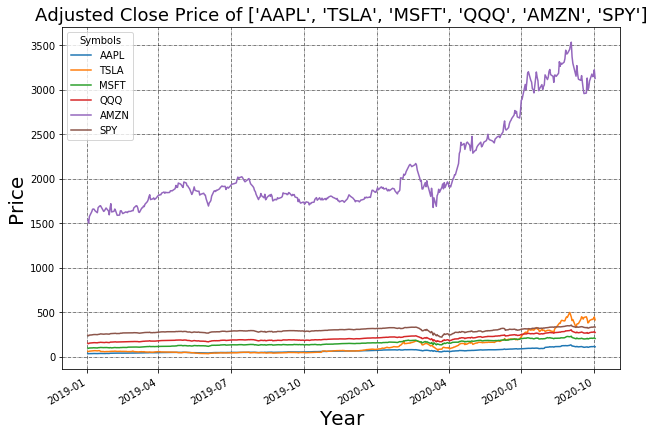

In [5]:
# Plot the adjusted close price
Stock_df['Adj Close'].plot( figsize = ( 10, 7))
# Define the label for the title of the figure
plt.title( "Adjusted Close Price of %s" % Tickers, fontsize = 18)
# Define the labels for x-axis and y-axis
plt.ylabel( 'Price', fontsize = 20)
plt.xlabel( 'Year', fontsize = 20)
# Plot the grid lines
plt.grid( which="major", color = 'k', linestyle = '-.', linewidth = 0.5)
# Show the plot
plt.show()

In [13]:
# Data Aggregations on closing price
Stock_df['Avg_5'] = Stock_df['Close'].rolling( window = 5, center = False).mean()
Stock_df['Avg_30'] = Stock_df['Close'].rolling( window = 30, center = False).mean()
Stock_df['Avg_365'] = Stock_df['Close'].rolling( window = 365, center = False).mean()
Stock_df['Std_5'] = Stock_df['Close'].rolling( window = 5, center = False).std()
Stock_df['Std_30'] = Stock_df['Close'].rolling( window = 365, center = False).std()
Stock_df['Std_365'] = Stock_df['Close'].rolling( window = 365, center = False).std()
Stock_df['Avg_5/365'] = Stock_df['Avg_5']/Stock_df['Avg_365']
Stock_df['Std_5/365'] = Stock_df['Std_5']/Stock_df['Std_365']

Stock_df.dropna( how= 'any', axis = 0, inplace = True)
# Splitting Data to Training and Test sets
df_train = df_new[df_new['Date'] < datetime(year = 2019, month = 6, day = 1)]
df_test = df_new[df_new['Date'] >= datetime(year = 2019, month = 6, day = 1)]

features = ['Avg_5', 'Avg_30', 'Avg_365', 'Std_5', 'Std_365', 'Avg_5/365', 'Std_5/365']
target = ['Adj Close']
X = df_train[features]
X_test = df_test[features]
y = df_train[target]
y_test = df_test[target]

ValueError: Wrong number of items passed 6, placement implies 1

In [180]:
# Import Normalizer 
from sklearn.preprocessing import Normalizer
# Initialize Normalizer
normalizer = Normalizer()
normal_movements = normalizer.fit_transform(np.array(Stock_df['Adj Close']).T)
print(normal_movements.min())
print(normal_movements.max())
print(normal_movements.mean())

0.021931793408497633
0.15127970424330398
0.0708271491009817


In [181]:
# Import
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Kmeans Model and Normalizer
normalizer = Normalizer()
kmeans = KMeans( n_clusters = 5, max_iter = 1000, random_state = 1)

# Pipeline btwn Normalizer and Kmeans Model
pipeline = make_pipeline( normalizer, kmeans)
# Fit Pipeline
pipeline.fit(np.array(Stock_df['Adj Close']).T)
predictions = pipeline.predict(np.array(Stock_df['Adj Close']).T)
# Check predictions
predictions

array([4, 1, 3, 3, 2, 0])

In [182]:
# Check Clustering
df_cluster = pd.DataFrame( {'Clusters':predictions, 'Companies': Tickers})
df_cluster

,Clusters,Companies
0,4,AAPL
1,1,TSLA
2,3,MSFT
3,3,QQQ
4,2,AMZN
5,0,SPY


In [183]:
normal_movements.shape

(6, 188)

In [185]:
# Import Principal Components Analysis
from sklearn.decomposition import PCA
normalizer = Normalizer()
# PCA to reduce dimension
pca_stock = PCA( n_components = 2)

kmeans = KMeans( n_clusters = 5, max_iter = 1000, random_state = 1)
# Include Pca into pipeline
pipeline_pca = make_pipeline( normalizer, pca_stock, kmeans)

pipeline_pca.fit(np.array(Stock_df['Adj Close']).T)
predictions = pipeline_pca.predict(np.array(Stock_df['Adj Close']).T)
# Check Clustering
df_cluster_2 = pd.DataFrame( {'Clusters': predictions, 'Companies': Tickers}).sort_values( by =['Clusters'], axis = 0)
df_cluster_2

,Clusters,Companies
5,0,SPY
1,1,TSLA
4,2,AMZN
2,3,MSFT
3,3,QQQ
0,4,AAPL


In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Training XGBoost on the Training set

In [ ]:
from xgboost import xgb
regressor = xgb()
regressor.fit(X_train, y_train)

Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [ ]:
# Visualising the Training set results
# Visualising the Test set results